In [4]:
import pandas as pd
archivo = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(archivo)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'amz_uk_price_prediction_dataset.csv'

In [ ]:
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [ ]:
df_category = df["category"].value_counts(normalize = True) * 100
df_top_5 = df_category.head()
df_top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [ ]:
#df["category"].value_counts(normalize = True)* 100

category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Alexa Built-In Devices                     0.004379
Motorbike Chassis                          0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: proportion, Length: 296, dtype: float64

In [ ]:
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?

In [ ]:
df_category = df["category"].value_counts(normalize = True)* 100

In [ ]:
import matplotlib.pyplot as plt
df_top_5 = df["category"].value_counts(normalize = True).head() * 100
df_top_5.plot(kind='bar', title='Top 5 Categorías')
plt.show()

In [ ]:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

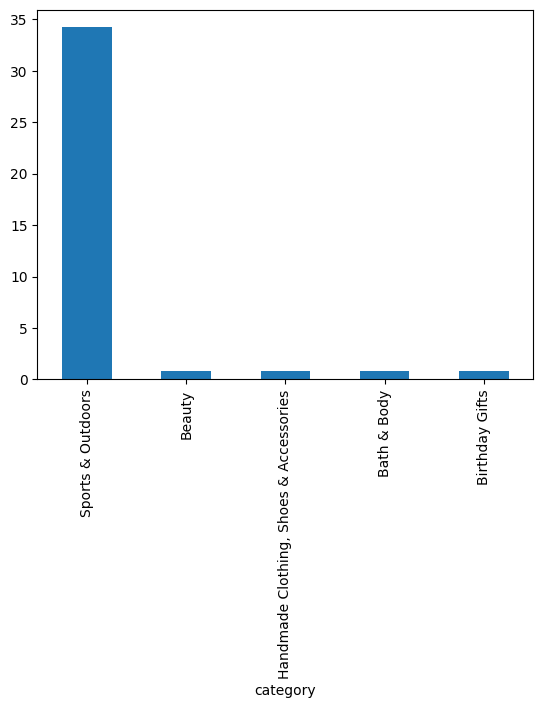

In [ ]:
ax = df_top_5.plot.bar(x='category', y='proportion', legend=False)

In [3]:
plot = df_top_5.plot.pie(y="proportion",figsize =(5,5))

NameError: name 'df_top_5' is not defined

In [ ]:
# Part 2: Delving into Product Pricing

In [ ]:
#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [ ]:
media = df["price"].mean()
mediana = df["price"].median()
moda = df["price"].mode()[0]
print(f'Media: {media}, Mediana: {mediana}, Moda: {moda}')

NameError: name 'df' is not defined

In [ ]:
print("diference:",df ["price"].mean()-df ["price"].mode()[0])
#


diference: 79.25380943923663


In [ ]:
#Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?

In [ ]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [ ]:
varianza = df["price"].var()
desviacion = df["price"].std()
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
print(f'Varianza: {varianza}, Desviación estándar: {desviacion}, Q1: {q1}, Q3: {q3}')


89.24380943923663
119445.48532254907
345.60886175349884
9.99
45.99
100000.0/0.0


In [ ]:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.

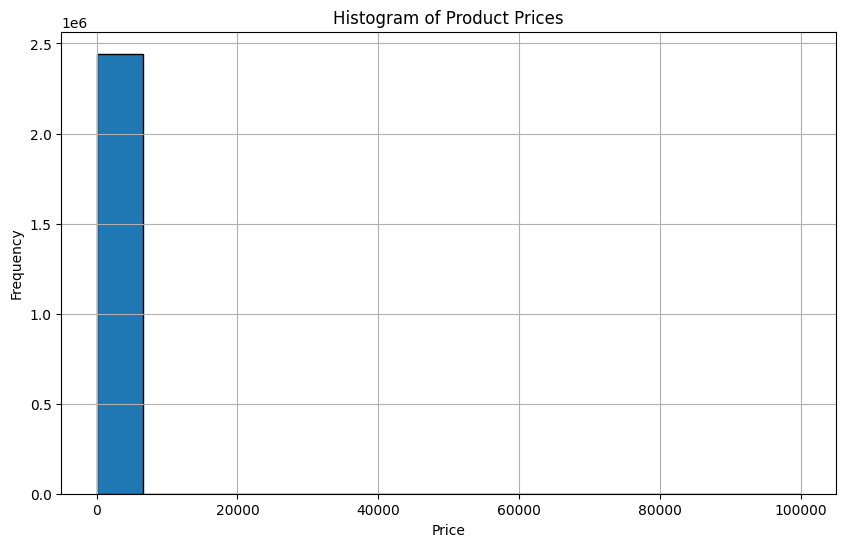

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=15, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices')
plt.grid(True)
plt.show()
# It is hard to understand because there are some outliers. It could be solved dropping the outliers

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=15, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Productos')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Precio')
plt.title('Diagrama de Caja de Precios de Productos')
plt.grid(True)
plt.show()

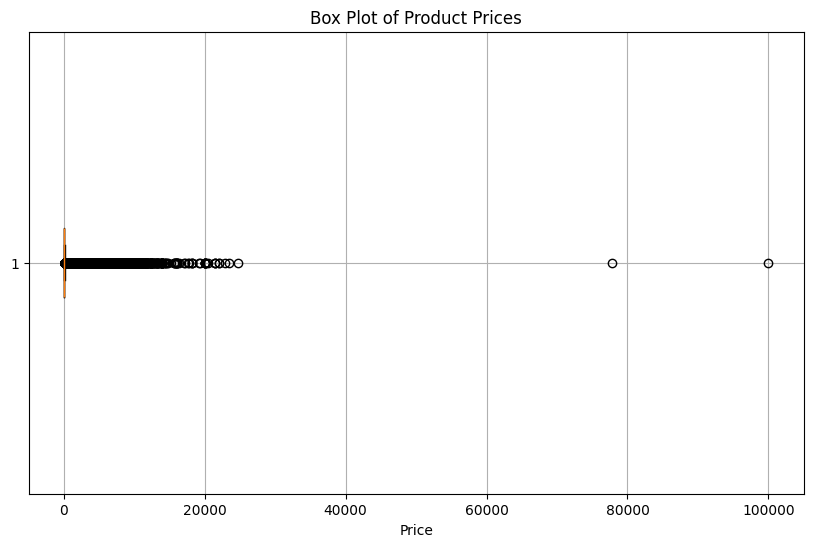

In [ ]:
#df["price"].hist(bins=10)

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)  # `vert=False` makes the box plot horizontal
plt.xlabel('Price')
plt.title('Box Plot of Product Prices')
plt.grid(True)
plt.show()


In [ ]:
#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

In [ ]:
media_cal = df["stars"].mean()
mediana_cal = df["stars"].median()
moda_cal = df["stars"].mode()[0]
print(f'Media: {media_cal}, Mediana: {mediana_cal}, Moda: {moda_cal}')
# Generally customers rate products with 0, that means that customers does not rate the products

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


In [ ]:
#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?


In [ ]:
varianza_cal = df["stars"].var()
desviacion_cal = df["stars"].std()
q1_cal = df["stars"].quantile(0.25)
q3_cal = df["stars"].quantile(0.75)
print(f'Varianza: {varianza_cal}, Desviación estándar: {desviacion_cal}, Q1: {q1_cal}, Q3: {q3_cal}')

# There are a huge variation in customer feedback because the variance is 4.8 and minimum is 0 and maximum is 5 

4.817434029796862
2.1948653785134207
0.0
4.4
5.0/0.0


In [ ]:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?


In [ ]:
from scipy.stats import skew, kurtosis
asimetria = skew(df['stars'])
curtosis = kurtosis(df['stars'])
print(f'Asimetría: {asimetria}, Curtosis: {curtosis}')


In [ ]:
#Skewness measures the asymmetry of the distribution.
#A skewness of 0 indicates a perfectly symmetrical distribution.
#Positive skewness (> 0) indicates that the tail on the right side is longer or fatter, suggesting that most ratings are concentrated on the lower end.

In [ ]:
#Kurtosis measures the "tailedness" of the distribution.
#Negative kurtosis (< 0) indicates fewer outliers than a normal distribution (platykurtic), suggesting a flatter distribution.

In [ ]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

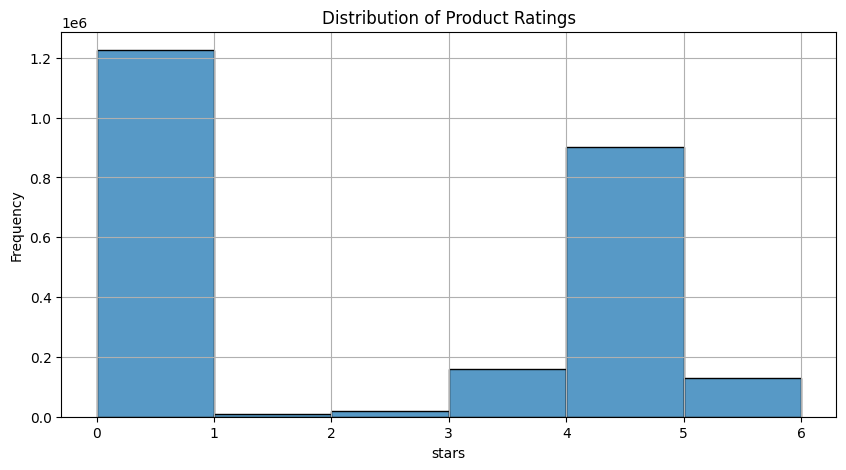

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['stars'], bins=range(0, 7), kde=False)
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 7))
plt.grid(True)
plt.show()

In [ ]:
# The most common rating is 0 